In [28]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def time_to_maturity(t0, T, y=252):
    t0 = np.datetime64(pd.to_datetime(t0), 'D')
    T = np.datetime64(pd.to_datetime(T), 'D')
    return (np.busday_count(t0, T) / y)

In [30]:
time_to_maturity('2018-08-01', '2018-12-14')

0.38492063492063494

In [31]:
def call_price(S, K, ttm, r, sigma):
	d1 = ( np.log(S / K) + (r + sigma**2 * 0.5) * ttm) / ( sigma * np.sqrt(ttm))
	d2 = ( np.log(S / K) + (r - sigma**2 * 0.5) * ttm) / ( sigma * np.sqrt(ttm))

	val = ( S * stats.norm.cdf(d1, 0.0, 1.0) ) - K * np.exp( -r * ttm ) * stats.norm.cdf(d2, 0.0, 1.0)
	return val

In [32]:
ttm = time_to_maturity('2018-9-1', '2018-12-14')
r = 0.025
sigma = 0.15

In [33]:
call_price(350, 350, ttm, r, sigma)

12.631163296464337

In [34]:
call_space = dict()
S = np.arange(200, 400, 10)
for s in S:
	call_space[s] = call_price(s, 300, ttm, r, sigma)
call_space

{200: 1.8229865417689555e-06,
 210: 3.724332522961858e-05,
 220: 0.0004848219345010875,
 230: 0.0042640947867984835,
 240: 0.02665577204552605,
 250: 0.12380641693770844,
 260: 0.44438348272742445,
 270: 1.2768817597123174,
 280: 3.032518983510599,
 290: 6.129007185638784,
 300: 10.826711396969444,
 310: 17.12542427826159,
 320: 24.78644022660987,
 330: 33.44839060274677,
 340: 42.75369718631481,
 350: 52.42501910316514,
 360: 62.28260578675133,
 370: 72.22579369772768,
 380: 82.20481472928111,
 390: 92.19760562684911}

In [35]:
call_space = dict()
K = np.arange(250, 350, 10)
S = np.arange(200, 400, 10)
for k in K:
	single_space = dict()
	for s in S:
		single_space[s] = call_price(s, k, ttm, r, sigma)
	call_space[k] = pd.Series(single_space)
call_space

{250: 200      0.022213
 210      0.135833
 220      0.579058
 230      1.825802
 240      4.488751
 250      9.022259
 260     15.466104
 270     23.460286
 280     32.478630
 290     42.059513
 300     51.902171
 310     61.849766
 320     71.834137
 330     81.829925
 340     91.828891
 350    101.828657
 360    111.828609
 370    121.828599
 380    131.828597
 390    141.828597
 dtype: float64,
 260: 200      0.004304
 210      0.033756
 220      0.180484
 230      0.697475
 240      2.051631
 250      4.811862
 260      9.383150
 270     15.793869
 280     23.714323
 290     32.658000
 300     42.185391
 310     51.997862
 320     61.931345
 330     71.910080
 340     81.903903
 350     91.902260
 360    101.901857
 370    111.901765
 380    121.901746
 390    131.901742
 dtype: float64,
 270: 200      0.000730
 210      0.007326
 220      0.049127
 230      0.233416
 240      0.826890
 250      2.285869
 260      5.137706
 270      9.744040
 280     16.123890
 290     23.974387
 

In [36]:
df_call_space = pd.DataFrame(call_space)
df_call_space

,250,260,270,280,290,300,310,320,330,340
200,0.022213,0.004304,0.000730,0.000110,0.000015,0.000002,2.051670e-07,2.137537e-08,2.078843e-09,1.901492e-10
210,0.135833,0.033756,0.007326,0.001405,0.000241,0.000037,5.257695e-06,6.833560e-07,8.245959e-08,9.308611e-09
220,0.579058,0.180484,0.049127,0.011791,0.002521,0.000485,8.468891e-05,1.355684e-05,2.005285e-06,2.761759e-07
230,1.825802,0.697475,0.233416,0.068909,0.018096,0.004264,9.096275e-04,1.771610e-04,3.175612e-05,5.278307e-06
240,4.488751,2.051631,0.826890,0.294930,0.093641,0.026656,6.855433e-03,1.605359e-03,3.449005e-04,6.847559e-05
250,9.022259,4.811862,2.285869,0.966895,0.365220,0.123806,3.789918e-02,1.054734e-02,2.687044e-03,6.309106e-04
260,15.466104,9.383150,5.137706,2.527836,1.117045,0.444383,1.598281e-01,5.224992e-02,1.561818e-02,4.294832e-03
270,23.460286,15.793869,9.744040,5.466003,2.776908,1.276882,5.324374e-01,2.020632e-01,7.011863e-02,2.236542e-02
280,32.478630,23.714323,16.123890,10.104931,5.796508,3.032519,1.445938e+00,6.293300e-01,2.508041e-01,9.189374e-02
290,42.059513,32.658000,23.974387,16.455946,10.465821,6.129007,3.294155e+00,1.623750e+00,7.349539e-01,3.062803e-01


In [37]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

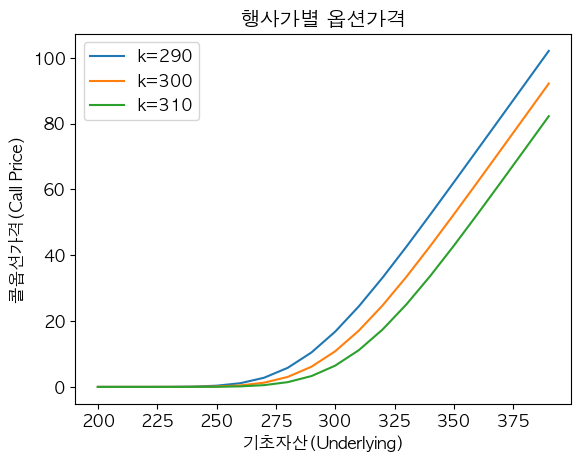

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_call_space[290], label='k=290')
ax.plot(df_call_space[300], label='k=300')
ax.plot(df_call_space[310], label='k=310')
ax.set_xlabel('기초자산(Underlying)')
ax.set_ylabel('콜옵션가격(Call Price)')
ax.set_title('행사가별 옵션가격')
ax.legend(loc='best')

In [39]:
S = np.arange(200, 400, 10)
call_price(S, 300, ttm, r, sigma)

array([1.82298654e-06, 3.72433252e-05, 4.84821935e-04, 4.26409479e-03,
       2.66557720e-02, 1.23806417e-01, 4.44383483e-01, 1.27688176e+00,
       3.03251898e+00, 6.12900719e+00, 1.08267114e+01, 1.71254243e+01,
       2.47864402e+01, 3.34483906e+01, 4.27536972e+01, 5.24250191e+01,
       6.22826058e+01, 7.22257937e+01, 8.22048147e+01, 9.21976056e+01])

In [40]:
K = np.arange(250, 350, 10)
S = np.arange(200, 400, 10)
call_price(S, K, ttm, r, sigma)

ValueError: operands could not be broadcast together with shapes (20,) (10,) 

In [41]:
K = np.arange(250, 350, 5)
S = np.arange(200, 400, 10)
call_price(S, K, ttm, r, sigma)

array([2.22131434e-02, 6.89203034e-02, 1.80483718e-01, 4.10056194e-01,
       8.26890264e-01, 1.50822008e+00, 2.52783587e+00, 3.94495525e+00,
       5.79650803e+00, 8.09429432e+00, 1.08267114e+01, 1.39636109e+01,
       1.74625277e+01, 2.12748025e+01, 2.53506674e+01, 2.96429042e+01,
       3.41090900e+01, 3.87126629e+01, 4.34231292e+01, 4.82157178e+01])

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

ValueError: Argument Z must be 2-dimensional.

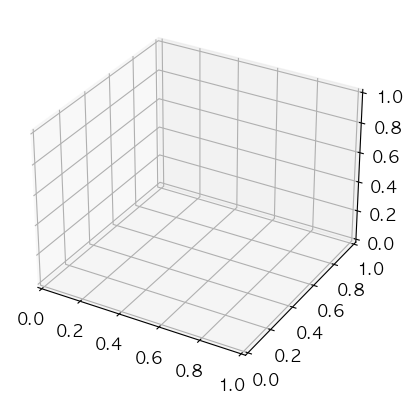

In [43]:
K = np.arange(250, 350, 5)
S = np.arange(200, 400, 10)

Z = call_price(S, K, ttm, r, sigma)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(S, K, Z, cmap=cm.summer, linewidth=1, antialiased=True, alpha=0.8)

ax.set_xlabel('기초자산(Underlying)')
ax.set_ylabel('행사가격(Strike')
ax.set_zlabel('콜옵션가격(Call Price)')
ax.set_title('콜옵션 가격 곡면을 그리고 싶었으나...')

fig.colorbar(surf, shrink=0.5, aspect=5)

Text(0.5, 0.92, '콜옵션 가격 곡면을 그리고 싶었으나...')

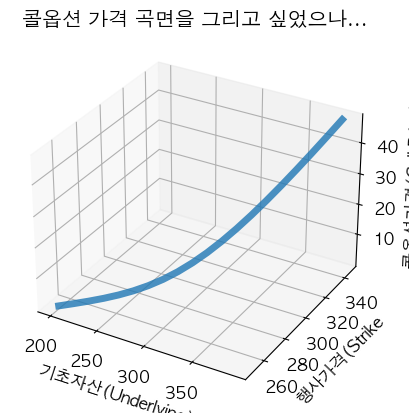

In [44]:
K = np.arange(250, 350, 5)
S = np.arange(200, 400, 10)

Z = call_price(S, K, ttm, r, sigma)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# surf = ax.plot_surface(S, K, Z, cmap=cm.summer, linewidth=1, antialiased=True, alpha=0.8)
surf = ax.plot(S, K, Z, linewidth=5, antialiased=True, alpha=0.8)

ax.set_xlabel('기초자산(Underlying)')
ax.set_ylabel('행사가격(Strike')
ax.set_zlabel('콜옵션가격(Call Price)')
ax.set_title('콜옵션 가격 곡면을 그리고 싶었으나...')

#fig.colorbar(surf, shrink=0.5, aspect=5)

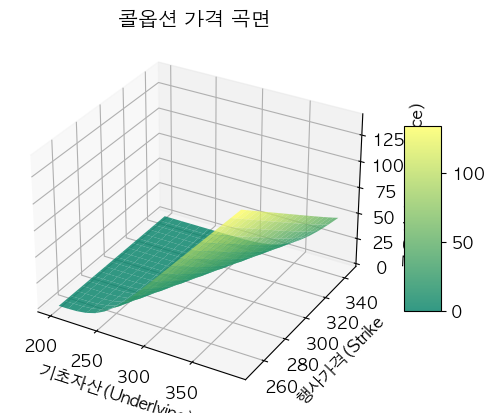

In [47]:
K = np.arange(250, 350, 5)
S = np.arange(200, 400, 10)
K, S = np.meshgrid(K, S)	# 매트릭스 만들기
Z = call_price(S, K, ttm, r, sigma)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(S, K, Z, cmap=cm.summer, linewidth=1, antialiased=True, alpha=0.8)
# surf = ax.plot(S, K, Z, linewidth=1, antialiased=True, alpha=0.8)

ax.set_xlabel('기초자산(Underlying)')
ax.set_ylabel('행사가격(Strike')
ax.set_zlabel('콜옵션가격(Call Price)')
ax.set_title('콜옵션 가격 곡면')

fig.colorbar(surf, shrink=0.5, aspect=5)

In [48]:
def put_price(S, K, ttm, r, sigma):
	d1 = ( np.log(S / K) + (r + sigma**2 * 0.5) * ttm) / ( sigma * np.sqrt(ttm) )
	d2 = ( np.log(S / K) + (r - sigma**2 * 0.5) * ttm) / ( sigma * np.sqrt(ttm) )
	val = K * np.exp( -r * ttm ) * stats.norm.cdf(-d2, 0.0, 1.0) - ( S * stats.norm.cdf(-d1, 0.0, 1.0))
	return val

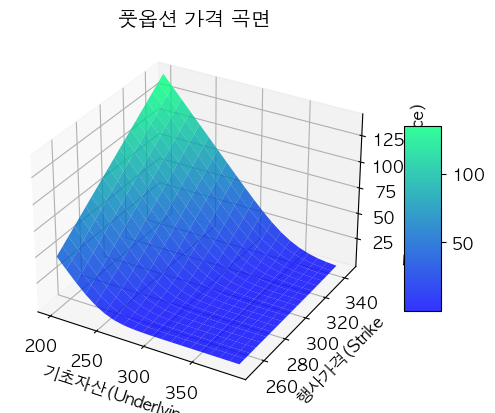

In [49]:
K = np.arange(250, 350, 5)
S = np.arange(200, 400, 10)
K, S = np.meshgrid(K, S)
Z = put_price(S, K, ttm, r, sigma)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(S, K, Z, cmap=cm.winter, linewidth=1, antialiased=True, alpha=0.8)

ax.set_xlabel('기초자산(Underlying')
ax.set_ylabel('행사가격(Strike')
ax.set_zlabel('풋옵션가격(Put Price)')
ax.set_title('풋옵션 가격 곡면')

fig.colorbar(surf, shrink=0.5, aspect=5)

In [50]:
def call_delta(S, K, ttm, r, sigma):
	d1 = ( np.log(S / K) + (r + sigma**2 * 0.5) * ttm ) / ( sigma * np.sqrt(ttm) )
	val = stats.norm.cdf(d1, 0.0, 1.0)
	return val

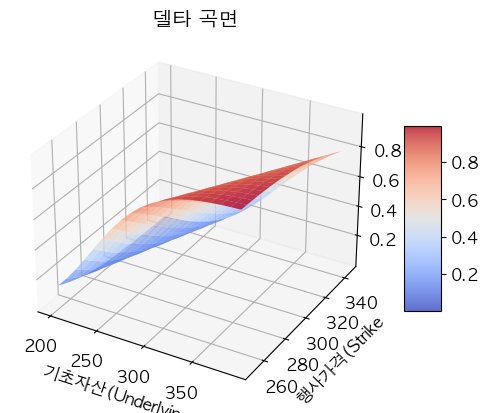

In [51]:
K = np.arange(250, 350, 5)
S = np.arange(200, 400, 10)
K, S = np.meshgrid(K, S)
Z = call_delta(S, K, 0.38, 0.02, 0.30)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(S, K, Z, cmap=cm.coolwarm, linewidth=1, antialiased=True, alpha=0.8)

ax.set_xlabel('기초자산(Underlying')
ax.set_ylabel('행사가격(Strike')
ax.set_zlabel('델타(Delta)')
ax.set_title('델타 곡면')

fig.colorbar(surf, shrink=0.5, aspect=5)

In [55]:
def put_delta(S, K, ttm, r, sigma):
	d1 = ( np.log(S / K) + (r + sigma**2 * 0.5) * ttm ) / ( sigma * np.sqrt(ttm) )
	val = stats.norm.cdf(d1, 0.0, 1.0)
	return (val - 1)

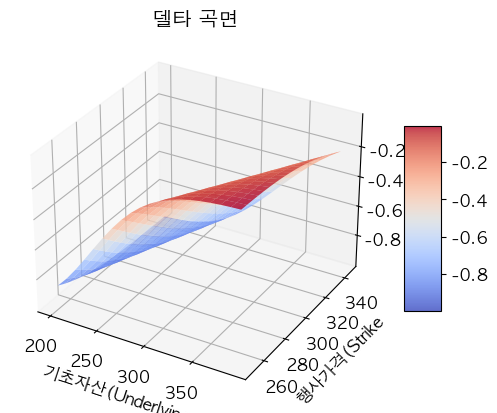

In [59]:
K = np.arange(250, 350, 5)
S = np.arange(200, 400, 10)
K, S = np.meshgrid(K, S)
Z = put_delta(S, K, 0.38, 0.02, 0.30)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(S, K, Z, cmap=cm.coolwarm, linewidth=1, antialiased=True, alpha=0.8)

ax.set_xlabel('기초자산(Underlying')
ax.set_ylabel('행사가격(Strike')
ax.set_zlabel('델타(Delta)')
ax.set_title('델타 곡면')

fig.colorbar(surf, shrink=0.5, aspect=5)

In [60]:
def ndx(x):
	return ( np.exp( -1 * x**2 * 0.5) / np.sqrt(2 * np.pi) )

In [61]:
def gamma(S, K, ttm, r, sigma):
	d1 = ( np.log(S / K) + (r + sigma**2 * 0.5) * ttm) / ( sigma * np.sqrt(ttm) )
	val = ( ndx(d1) ) / ( S * sigma * np.sqrt(ttm))
	return val

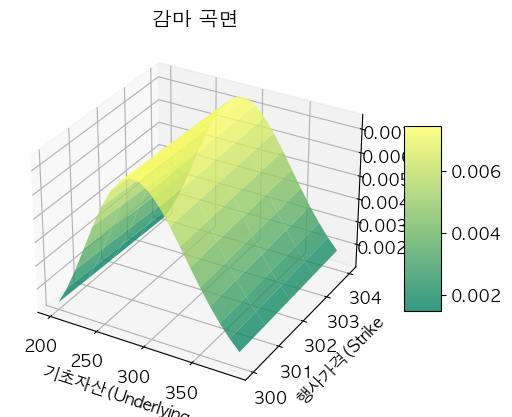

In [63]:
K = np.arange(300, 305)
S = np.arange(200, 400, 10)
K, S = np.meshgrid(K, S)
Z = gamma(S, K, 0.38, 0.02, 0.30)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(S, K, Z, cmap=cm.summer, linewidth=1, antialiased=True, alpha=0.8)

ax.set_xlabel('기초자산(Underlying')
ax.set_ylabel('행사가격(Strike')
ax.set_zlabel('감마(Gamma)')
ax.set_title('감마 곡면')

fig.colorbar(surf, shrink=0.5, aspect=5)

In [66]:
def call_theta(S, K, ttm, r, sigma):
	d1 = (np.log(S/K) + (r + sigma**2 * 0.5) * ttm) / (sigma * np.sqrt(ttm))
	d2 = (np.log(S/K) + (r - sigma**2 * 0.5) * ttm) / (sigma * np.sqrt(ttm))
	val = -1 * (( S *  ndx(d1) * sigma) / (s * np.sqrt(ttm))- r * K * np.exp(-r * ttm) * stats.norm.cdf(d2, 0.0, 1.0))
	return val

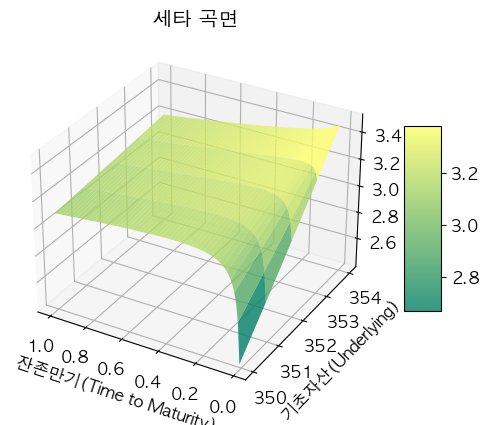

In [69]:
T = np.arange(1.0, 0.0, -0.01)
S = np.arange(350, 355)
T, S = np.meshgrid(T, S)
Z = call_theta(S, 350, T, 0.02, 0.30)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(T, S, Z, cmap=cm.summer, linewidth=1, antialiased=True, alpha=0.8)

ax.set_xlabel('잔존만기(Time to Maturity)')
ax.set_ylabel('기초자산(Underlying)')
ax.set_zlabel('세타(Theta)')
ax.invert_xaxis() 		# X 축을 1부터 0의 순서로 거꾸로 출력
ax.set_title('세타 곡면')

fig.colorbar(surf, shrink=0.5, aspect=5)

In [70]:
def vega(S, K, ttm, r, sigma):
	d1 = (np.log(S / K) + (r + sigma**2 * 0.5) * ttm) / (sigma * np.sqrt(ttm))
	d2 = (np.log(S / K) + (r - sigma**2 * 0.5) * ttm) / (sigma * np.sqrt(ttm))
	val = (S * np.sqrt(ttm) * ndx(d1))
	return val

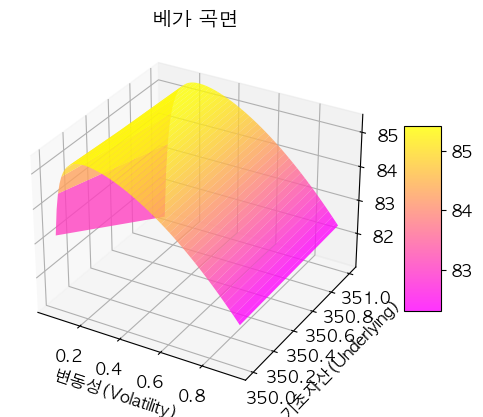

In [71]:
V = np.arange(0.05, 0.95, 0.01)
S = np.arange(350, 352)
V, S = np.meshgrid(V, S)
Z = vega(S, 350, 0.38, 0.02, V)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(V, S, Z, cmap=cm.spring, linewidth=1, antialiased=True, alpha=0.8)

ax.set_xlabel('변동성(Volatility)')
ax.set_ylabel('기초자산(Underlying)')
ax.set_zlabel('베가(Vega)')
ax.set_title('베가 곡면')

fig.colorbar(surf, shrink=0.5, aspect=5)